### Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.



### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [167]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from tensorflow.keras.optimizers import Adam

In [8]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [11]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path('C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')

In [13]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [17]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##train_ds = ##todo

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [22]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##val_ds = ##todo

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

# Store them in a list
list_of_skin_cancer_classes = list(class_names)
#print(list_of_skin_cancer_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

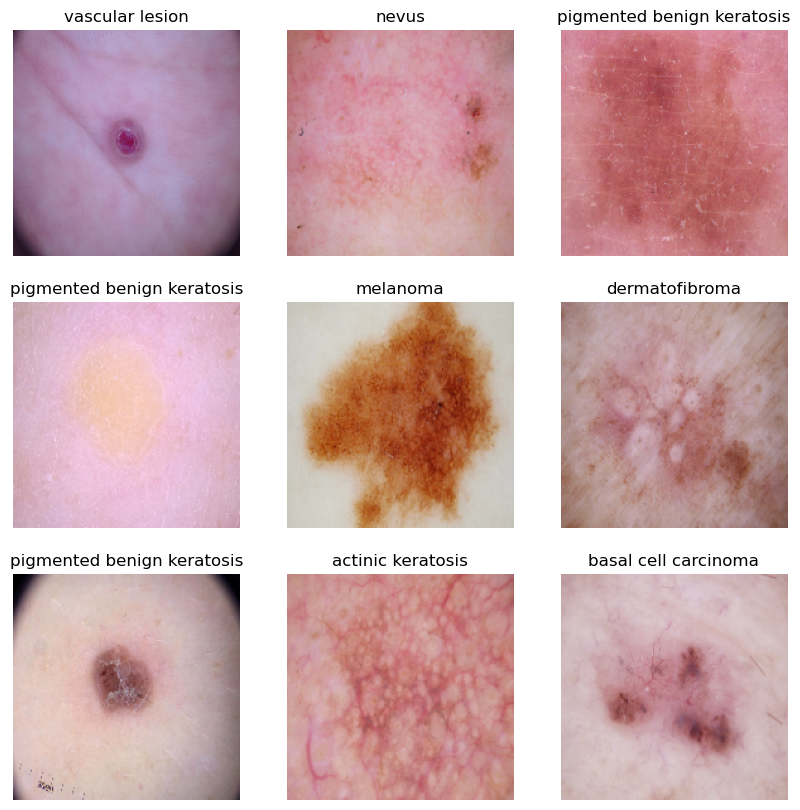

In [27]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [31]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [34]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [37]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [42]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - accuracy: 0.1959 - loss: 2.3189 - val_accuracy: 0.3378 - val_loss: 1.8467
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - accuracy: 0.3161 - loss: 1.8445 - val_accuracy: 0.3982 - val_loss: 1.6164
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy: 0.3938 - loss: 1.6620 - val_accuracy: 0.4832 - val_loss: 1.5417
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy: 0.4440 - loss: 1.5570 - val_accuracy: 0.4698 - val_loss: 1.4934
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.5056 - loss: 1.3936 - val_accuracy: 0.5235 - val_loss: 1.4406
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.5295 - loss: 1.3417 - val_accuracy: 0.5280 - val_loss: 1.3598
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.5437 - loss: 1.3148 - val_accuracy: 0.4474 - val_loss: 1.5726
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.5591 - loss: 1.2309 - val_accu

### Visualizing training results

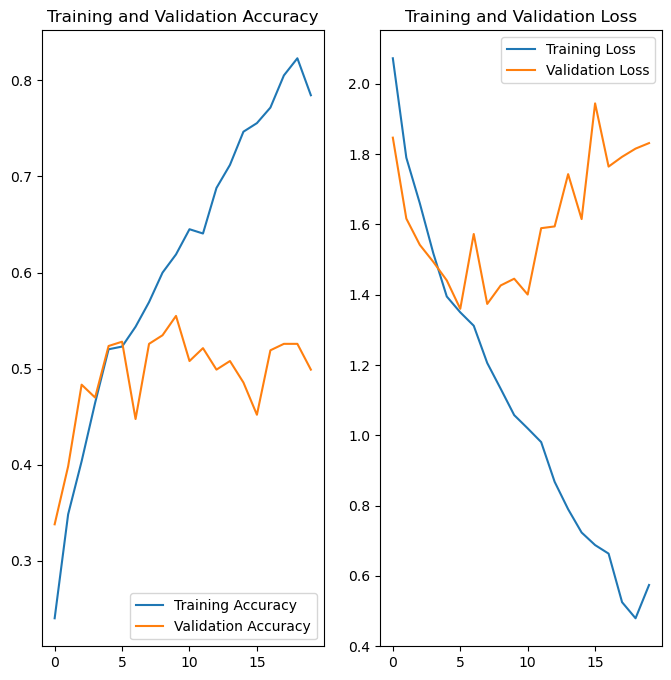

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

There is clear evidence of model overfitting-

- Training accuracy is 0.82 after 20 epochs but validation accuracy is 0.50 (difference of 0.32)
- Training loss is going down after every epoch but validation loss is going up.

In [49]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# Balanced augmentation


# Data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the image by up to 20 degrees
    zoom_range=0.1,          # Random zoom up to 10%
    width_shift_range=0.1,   # Horizontal shift by 10%
    height_shift_range=0.1,  # Vertical shift by 10%
    horizontal_flip=True,    # Random horizontal flipping
    fill_mode='nearest',     # Fill strategy for new pixels after shift/rotation
    validation_split=0.2     # Split the dataset for validation
)

# No augmentation for validation data
val_datagen = ImageDataGenerator(
    validation_split=0.2  # Only splitting for validation, no augmentation
)

# Load training data with augmentation (subset='training')
train_ds_aug = datagen.flow_from_directory(
    data_dir_train,               # Path to training data directory
    target_size=(180, 180),   # Resize images to 180x180
    batch_size=32,            # Batch size
    class_mode='categorical', # Multi-class classification
    subset='training',        # Select the training data subset (80%)
    seed=123                  # For reproducibility
)

# Load validation data without augmentation (subset='validation')
val_ds = val_datagen.flow_from_directory(
    data_dir_train,               # Same directory, but without augmentation
    target_size=(180, 180),   # Resize images to 180x180
    batch_size=32,
    class_mode='categorical',
    subset='validation',     # Select the validation data subset (20%)
    seed=123
)



Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


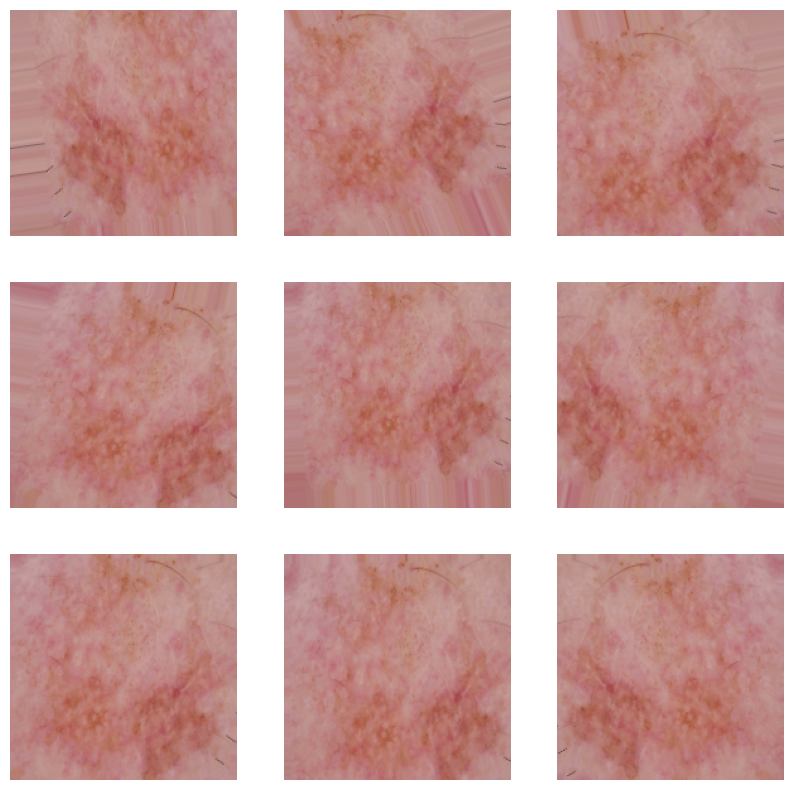

In [51]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Visualizing how augmentation strategy works for one instance of training image.

# Load one image from the training dataset
for images, _ in train_ds.take(1):  
    img = images[0].numpy().astype('uint8')  # Take the first image and convert it to numpy array

# Reshape the image for the generator 
img = np.expand_dims(img, 0)

# Generate augmented images from the single image
augmented_images = datagen.flow(img, batch_size=1)

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    aug_img = next(augmented_images)[0].astype('uint8')  # Generate next augmented image
    plt.imshow(aug_img)
    plt.axis('off')

plt.show()

### Todo:
### Create the model, compile and train the model


In [54]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her# Define the CNN model with Dropout layers
model_aug = Sequential([
    
    # Rescaling layer to normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # First convolutional layer 
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    
    
    # Second convolutional layer 
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.MaxPooling2D((2, 2)),
    
    
    
    # Third convolutional layer 
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
   
   
    
    # Flatten the output of the convolutional layers
    layers.Flatten(),
    
    # Dense layer with Dropout
    layers.Dense(256, activation='relu'), # kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout with 50% rate to prevent overfitting
    
    # Output layer for 9 classes with softmax activation
    layers.Dense(9, activation='softmax')
])



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model



In [57]:
## Your code goes here
model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [59]:
model_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,955,529 (60.87 MB)

 Trainable params: 15,955,529 (60.87 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [62]:
## Your code goes here, note: train your model for 20 epochs
#Train Model
epochs = 20
history_aug = model_aug.fit(
  train_ds_aug,
  validation_data=val_ds,
  epochs= epochs
)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.2158 - loss: 2.5758 - val_accuracy: 0.2815 - val_loss: 1.8753
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3519 - loss: 1.7786 - val_accuracy: 0.4279 - val_loss: 1.7359
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.4453 - loss: 1.5717 - val_accuracy: 0.4820 - val_loss: 1.6973
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4862 - loss: 1.5022 - val_accuracy: 0.4482 - val_loss: 1.7264
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4681 - loss: 1.5019 - val_accuracy: 0.4459 - val_loss: 1.8098
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5131 - loss: 1.4275 - val_accuracy: 0.4234 - val_loss: 1.9715
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5073 - loss: 1.4337 - val_accuracy: 0.4527 - val_loss: 2.0105
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5280 - loss: 1.3748 - val_accuracy: 0.4730 - val_loss:

### Visualizing the results

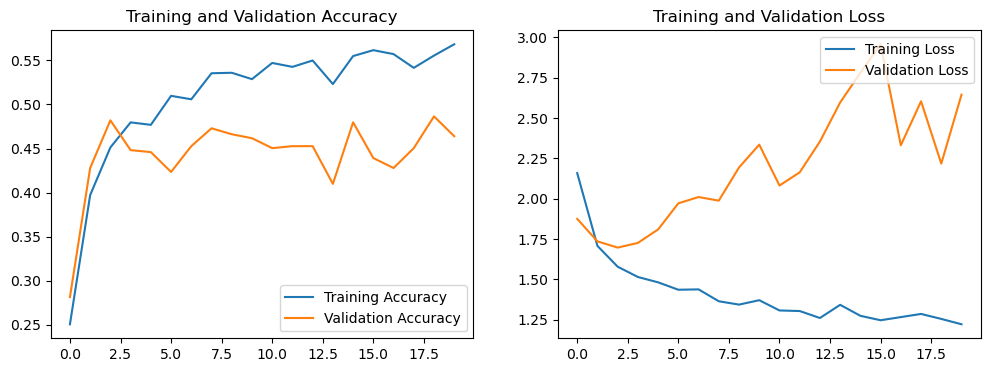

In [65]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is no evidence of overfitting. Training and validation accuraies are quite close (0.58, 0.46)

There is evidence of underfitting because training and validation accuracies are quite low (<0.7)

It looks like image augmentation has helped in getting rid of overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [69]:
## Your code goes here.
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [71]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [73]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
1,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
2,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
3,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
4,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis


In [188]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


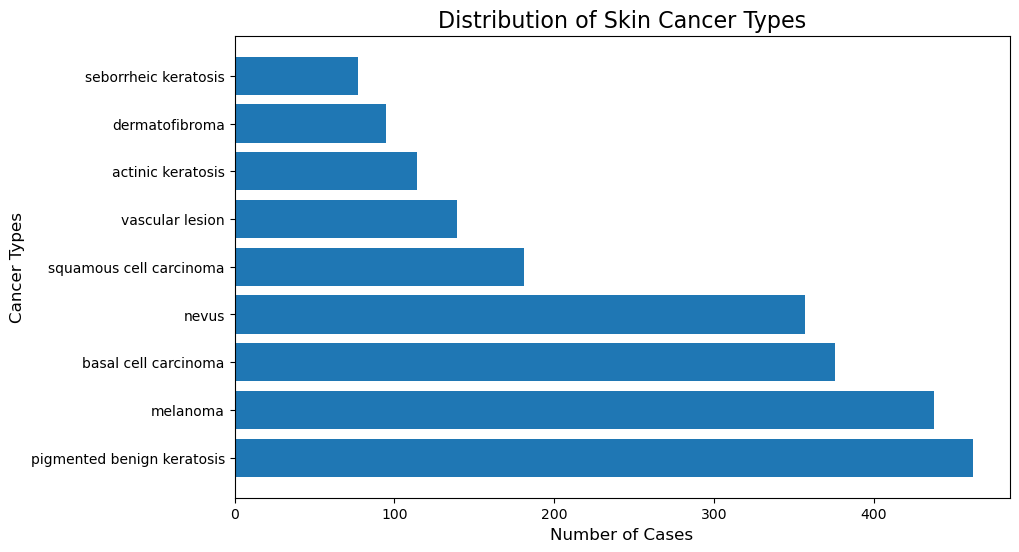

In [190]:
value_counts = original_df['Label'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(value_counts.index, value_counts.values) #, color='lightblue')

# Add title and labels
plt.title('Distribution of Skin Cancer Types', fontsize=16)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Cancer Types', fontsize=12)

# Display the plot
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
#### - pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [79]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [82]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FEA8D5D820>: 100%|█| 500/500 [00:04<00:00, 114.42 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FEA909CAA0>: 100%|█| 500/500 [00:03<00:00, 127.83 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FEA8D7BC80>: 100%|█| 500/500 [00:04<00:00, 117.09 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x1FEA6702ED0>: 100%|█| 500/500 [00:34<00:00, 14.50 Sample


Initialised with 357 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1FEA909E510>: 100%|█| 500/500 [00:24<00


Initialised with 462 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FEA90BA180>: 100%|█| 500/500 [00:05<00:00, 89.83 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FEA8BEFE90>: 100%|█| 500/500 [00:13<00:00, 37.98 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FEA685E120>: 100%|█| 500/500 [00:05<00:


Initialised with 139 image(s) found.
Output directory set to C:\Users\hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FEA90C2C30>: 100%|█| 500/500 [00:05<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [85]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [87]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:2]

['C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1d2c388f-b4c2-4c0d-833b-8558c7a59e83.jpg',
 'C:\\Users\\hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_298bdb94-a33b-466e-8439-054f2d90590a.jpg']

In [89]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['actinic keratosis', 'actinic keratosis']

In [93]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [101]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])new_df = pd.concat([original_df, df2], ignore_index=True)

)

In [103]:
# Check the shape of the new DataFrame
new_df.shape

(6739, 2)

In [105]:
new_df.head()


,Path,Label
0,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
1,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
2,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
3,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis
4,C:\Users\hp\Downloads\CNN_assignment\Skin canc...,actinic keratosis


In [107]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [111]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [113]:
train_datagen = ImageDataGenerator(    
    validation_split=0.2  # Split the training data into train and validation sets
)

# Prepare training and validation datasets
train_dataset = train_datagen.flow_from_directory(
    data_dir_train,
    seed = 123,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)



Found 5395 images belonging to 9 classes.


#### **Todo:** Create a validation dataset

In [116]:
val_dataset = train_datagen.flow_from_directory(
    data_dir_train,
    seed = 123,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1344 images belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [123]:
## your code goes here
model_bal = Sequential([
    
    # Rescaling layer to normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3),),
    
    # First convolutional layer with Dropout
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
   
    
    # Second convolutional layer with Dropout
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    
    
    # Third convolutional layer with Dropout
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    
    
    # Flatten the output of the convolutional layers
    layers.Flatten(),
    
    # Dense layer with Dropout
    layers.Dense(512, activation='relu'),#kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout with 50% rate to prevent overfitting
    
    # Output layer for 9 classes with softmax activation
    layers.Dense(9, activation='softmax')
])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [193]:
model_bal.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,459,293 (364.15 MB)

 Trainable params: 31,819,273 (121.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 63,638,548 (242.76 MB)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [126]:
## your code goes here

model_bal.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [129]:
epochs = 30
history_bal = model_bal.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.3257 - loss: 2.5298 - val_accuracy: 0.1332 - val_loss: 5.2446
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.5233 - loss: 1.3950 - val_accuracy: 0.1890 - val_loss: 2.9293
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.6257 - loss: 1.1162 - val_accuracy: 0.5357 - val_loss: 1.3040
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.6963 - loss: 0.8652 - val_accuracy: 0.4487 - val_loss: 1.9533
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.7546 - loss: 0.6891 - val_accuracy: 0.2381 - val_loss: 3.8719
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.7911 - loss: 0.5659 - val_accuracy: 0.4323 - val_loss: 2.0113
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8034 - loss: 0.5301 - val_accuracy: 0.3891 - val_loss: 2.3190
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8241 - loss: 0.4840 - val_accu

#### **Todo:**  Visualize the model results

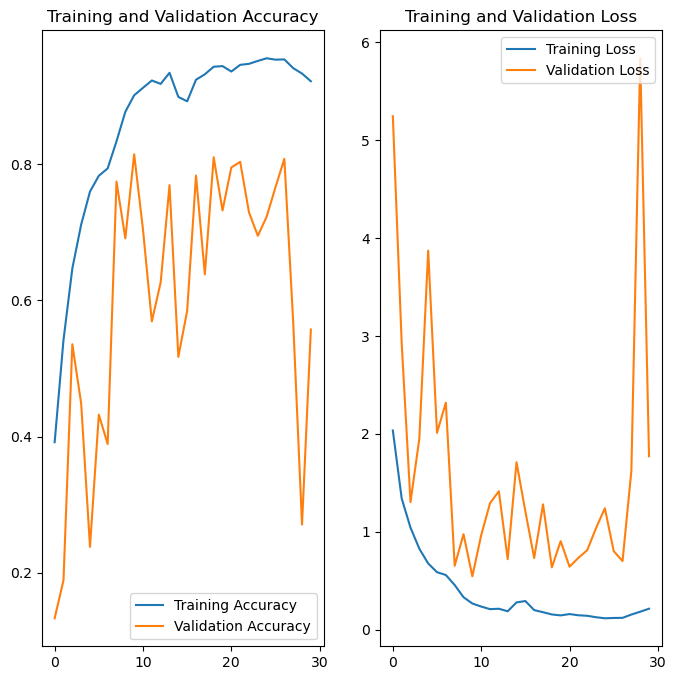

In [132]:
acc = history_bal.history['accuracy']
val_acc = history_bal.history['val_accuracy']

loss = history_bal.history['loss']
val_loss = history_bal.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Training accuracy has gradually increased (93%)
- Validation accuracy has gone up and down. Too much fluctuation.(55%)
- Still it shows a problem of overfitting.
- Steps needs to be taken to improve the validation accuracy.

In [156]:
train_datagen = ImageDataGenerator(    
    validation_split=0.2  # Split the training data into train and validation sets
)

# Prepare training and validation datasets
train_dataset = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_dataset = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5395 images belonging to 9 classes.
Found 1344 images belonging to 9 classes.


In [169]:
model_bal1 = Sequential([
    
    # Rescaling layer to normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3),),
    
    # First convolutional layer with Dropout
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
   
    
    # Second convolutional layer with Dropout
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    
    # Third convolutional layer with Dropout
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    
    # Flatten the output of the convolutional layers
    layers.Flatten(),
    
    # Dense layer with Dropout
    layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout with 50% rate to prevent overfitting
    
    # Output layer for 9 classes with softmax activation
    layers.Dense(9, activation='softmax')
])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [171]:
# Set custom learning rate for the Adam optimizer
learning_rate = 0.0001

# Compile the model
model_bal1.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
epochs = 30
history_bal1 = model_bal1.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.2217 - loss: 2.7837 - val_accuracy: 0.4256 - val_loss: 1.9233
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.4088 - loss: 1.8951 - val_accuracy: 0.4650 - val_loss: 1.7208
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.4726 - loss: 1.6868 - val_accuracy: 0.4985 - val_loss: 1.5425
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.5114 - loss: 1.5480 - val_accuracy: 0.5305 - val_loss: 1.4602
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.5446 - loss: 1.4560 - val_accuracy: 0.5536 - val_loss: 1.3903
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.5641 - loss: 1.3931 - val_accuracy: 0.6228 - val_loss: 1.3042
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.6060 - loss: 1.3095 - val_accuracy: 0.6153 - val_loss: 1.2723
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.6373 - loss: 1.2238 - val_accu

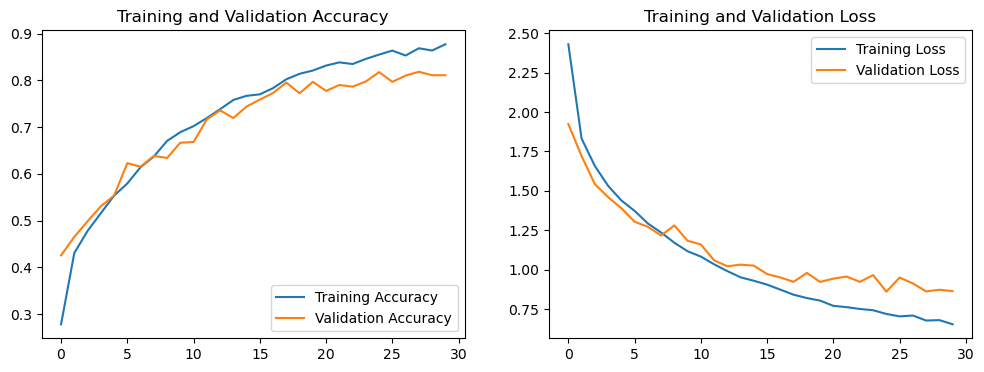

In [175]:
acc = history_bal1.history['accuracy']
val_acc = history_bal1.history['val_accuracy']

loss = history_bal1.history['loss']
val_loss = history_bal1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:
It looks like we have got rid of Overfitting and Underfitting problem:

Training accuracy is 88% and Validation accuracy is 81%.

#### Model Prediction:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


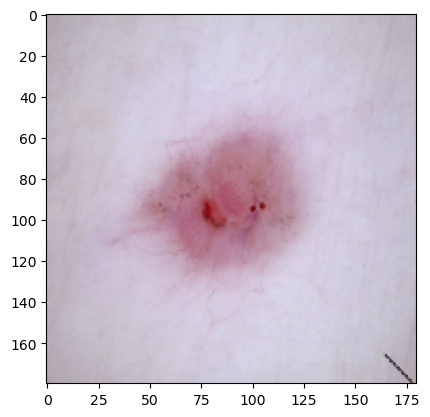

In [180]:
import PIL
from glob import glob
from tensorflow.keras.preprocessing.image import load_img

# Construct the path to a test image
test_image_path = os.path.join(data_dir_test, class_names[1], '*')

# Get a list of all test images for the selected class
test_images = glob(test_image_path)

# Load the last test image in the list
test_image = load_img(test_images[8], target_size=(180, 180, 3))

# Display the test image
plt.imshow(test_image)
plt.grid(False)

# Expand dimensions to match the input shape of the model
img = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
pred = model.predict(img)

# Get the index of the predicted class with the highest probability
pred = np.argmax(pred)

# Get the predicted class name
pred_class = class_names[pred]

# Print the actual and predicted class names
print("Actual Class: " + class_names[1])
print("Predicted Class: " + pred_class)

In [182]:
batch_size = 32
img_height = 180
img_width = 180

# Create the training and validation datasets with 80-20 split
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,                      # Fixed seed for reproducibility
    image_size=(img_height, img_width),  # Resize images to the specified height and width
    batch_size=batch_size          # Use the specified batch size
)

Found 118 files belonging to 9 classes.


In [184]:
# Set custom learning rate for the Adam optimizer
learning_rate = 0.0001

# Compile the model
model_bal1.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
epochs = 30
history_test = model_bal.fit(
  test_dataset,
  epochs=epochs
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9419 - loss: 0.2035
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9349 - loss: 0.1976
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9403 - loss: 0.1574
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9627 - loss: 0.1665
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9685 - loss: 0.1280
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9732 - loss: 0.1370
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9791 - loss: 0.1022
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9440 - loss: 0.1689
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9818 - loss: 0.0937
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9479 - loss: 0.1691
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9797 - loss: 0.0792
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9609 - loss: 0.1195
Epoch 13/30
4/4 ━━━━━━━━━